# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel. 

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


--- 
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [2]:
# importar librerías
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')#completa el código
usage = pd.read_csv('/datasets/usage.csv')#completa el código

In [4]:
# mostrar las primeras 5 filas de plans
plans.head()

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [5]:
# mostrar las primeras 5 filas de users
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [6]:
# mostrar las primeras 5 filas de usage
usage.head()

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [7]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)

plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [8]:
# inspección de plans con .info()
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [9]:
# inspección de users con .info()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [10]:
# inspección de usage con .info()
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [11]:
# cantidad de nulos para users
print(users.isna().sum())# Cantidad de valores nulos)
print(users.isna().mean()*100)# Proporción de valores nulos)

user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64
user_id        0.000
first_name     0.000
last_name      0.000
age            0.000
city          11.725
reg_date       0.000
plan           0.000
churn_date    88.350
dtype: float64


In [12]:
# cantidad de nulos para usage
print(usage.isna().sum())# Cantidad de valores nulos)
print(usage.isna().mean()*100)

id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64
id           0.000
user_id      0.000
type         0.000
date         0.125
duration    55.190
length      44.740
dtype: float64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos. 
 
 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?  
- Indica qué harías: ¿imputar, eliminar, ignorar?

### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [13]:
# explorar columnas numéricas de users
users.describe()

,user_id,age
count,4000.000000,4000.000000
mean,11999.500000,33.739750
std,1154.844867,123.232257
min,10000.000000,-999.000000
25%,10999.750000,32.000000
50%,11999.500000,47.000000
75%,12999.250000,63.000000
max,13999.000000,79.000000


- La columna `user_id` en la media coincide con el 50% lo que quiere decir que estan bien distribuidos y las filas estan completas.
- La columna `age` en la cantidad minima me muestra que hay centinelas pudiendo esto afectar el promedio o la media ya que tiene desviacion estandar alta 123.23 y las filas estan completas.

In [14]:
# explorar columnas numéricas de usage
usage.describe()

,id,user_id,duration,length
count,40000.00000,40000.000000,17924.000000,22104.000000
mean,20000.50000,12002.405975,5.202237,52.127398
std,11547.14972,1157.279564,6.842701,56.611183
min,1.00000,10000.000000,0.000000,0.000000
25%,10000.75000,10996.000000,1.437500,37.000000
50%,20000.50000,12013.000000,3.500000,50.000000
75%,30000.25000,13005.000000,6.990000,64.000000
max,40000.00000,13999.000000,120.000000,1490.000000


- La columna `id y user_id` en la media coincide con el 50% lo que quiere decir que estan bien distribuidos y las filas estan completas.
- La columna duration y length en "duration" la media es de 5.2 es diferente del 50% ,esto indica que los datos están sesgados a la derecha; hay algunas llamadas muy largas (120). En "length" el maximo esta muy alto comparado con la media lo que indica usuarios extremos o que hay outliers.

In [15]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']
for col in columnas_user:
    print(f"--- Análisis de la columna: {col} ---")
    print(f"Valores únicos: {users[col].unique()}")
    print(f"\nConteo de cada categoría:")
    print(users[col].value_counts())
    print("-" * 40)

--- Análisis de la columna: city ---
Valores únicos: ['Medellín' '?' 'CDMX' 'Bogotá' 'GDL' 'MTY' nan 'Cali']

Conteo de cada categoría:
Bogotá      808
CDMX        730
Medellín    616
GDL         450
Cali        424
MTY         407
?            96
Name: city, dtype: int64
----------------------------------------
--- Análisis de la columna: plan ---
Valores únicos: ['Basico' 'Premium']

Conteo de cada categoría:
Basico     2595
Premium    1405
Name: plan, dtype: int64
----------------------------------------


- La columna `city` aparecen 96 datos con centinela ? lo que hay que limpiar imputando y tambien aparecen valores nan
- La columna `plan` aproximadamente el 65% de tus usuarios están en el plan Básico y el 35% en el Premium.

In [16]:
# explorar columna categórica de usage
 # completa el código
print(usage['type'].unique())

print("\nConteo de eventos por tipo:")
print(usage['type'].value_counts())

print("\nProporción de cada tipo (%):")
print(usage['type'].value_counts(normalize=True) * 100)

['call' 'text']

Conteo de eventos por tipo:
text    22092
call    17908
Name: type, dtype: int64

Proporción de cada tipo (%):
text    55.23
call    44.77
Name: type, dtype: float64


- La columna `type` La mayoría de los eventos registrados son mensajes de texto (55.23%) frente a las llamadas (44.77%)


---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso. 

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels?  en la columna "age", "city"
- ¿Qué acción tomarías?  imputar con la media en age y poner unkown en city

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [17]:
# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users['reg_date'])# completa el código

In [18]:
# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage['date'])# completa el código

In [19]:
# Revisar los años presentes en `reg_date` de users
print("\nConteo por año:")
print(users['reg_date'].dt.year.value_counts())
print("\nPrimeras fechas:")
print(users['reg_date'].head())
print("\nInformación de la columna reg_date:")
print(f"Tipo de datos: {users['reg_date'].dtype}")
print(f"Rango de fechas: {users['reg_date'].min()} a {users['reg_date'].max()}")
print(f"Total de registros: {len(users['reg_date'])}")
print(f"Valores nulos: {users['reg_date'].isnull().sum()}")


Conteo por año:
2024    1330
2023    1316
2022    1314
2026      40
Name: reg_date, dtype: int64

Primeras fechas:
0   2022-01-01 00:00:00.000000000
1   2022-01-01 06:34:17.914478619
2   2022-01-01 13:08:35.828957239
3   2022-01-01 19:42:53.743435858
4   2022-01-02 02:17:11.657914478
Name: reg_date, dtype: datetime64[ns]

Información de la columna reg_date:
Tipo de datos: datetime64[ns]
Rango de fechas: 2022-01-01 00:00:00 a 2026-05-10 00:00:00
Total de registros: 4000
Valores nulos: 0


En `reg_date`, aparecen los 4000 pero aparecen 40 del 2026 esto debe ser incorrecto

In [20]:
# Revisar los años presentes en `date` de usage
print("\nConteo por año:")
print(usage['date'].dt.year.value_counts())
print("\nPrimeras fechas:")
print(usage['date'].head())
print("\nInformación de la columna date:")
print(f"Tipo de datos: {usage['date'].dtype}")
print(f"Rango de fechas: {usage['date'].min()} a {usage['date'].max()}")
print(f"Total de registros: {len(usage['date'])}")
print(f"Valores nulos: {usage['date'].isnull().sum()}")


Conteo por año:
2024.0    39950
Name: date, dtype: int64

Primeras fechas:
0   2024-01-01 00:00:00.000000000
1   2024-01-01 00:06:30.969774244
2   2024-01-01 00:13:01.939548488
3   2024-01-01 00:19:32.909322733
4   2024-01-01 00:26:03.879096977
Name: date, dtype: datetime64[ns]

Información de la columna date:
Tipo de datos: datetime64[ns]
Rango de fechas: 2024-01-01 00:00:00 a 2024-06-30 00:00:00
Total de registros: 40000
Valores nulos: 50


En `date`, ... haz doble clic en este bloque y escribe qué ves.  
Basaremos el análisis en estas fechas.

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)
- ¿Qué harías con ellas?

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [21]:
# Reemplazar -999 por la mediana de age
age_mediana = users.loc[users['age'] != -999, 'age'].median()
users['age'] = users['age'].replace(-999, age_mediana)

# Verificar cambios
users['age'].describe()

count    4000.000000
mean       48.136000
std        17.689919
min        18.000000
25%        33.000000
50%        48.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [36]:
# Reemplazar ? por NA en city
import numpy as np
users['city'] = users['city'].replace('?', np.nan)
# Verificar cambios
print(users['city'].value_counts())
print(users['city'].value_counts(dropna=False))

Bogotá      808
CDMX        730
Medellín    616
GDL         450
Cali        424
MTY         407
Name: city, dtype: int64
Bogotá      808
CDMX        730
Medellín    616
NaN         565
GDL         450
Cali        424
MTY         407
Name: city, dtype: int64


In [38]:
# Marcar fechas futuras como NA para reg_date
from datetime import datetime
import pandas as pd
fecha_actual = datetime.now()
users.loc[users['reg_date'] > fecha_actual, 'reg_date'] = pd.NaT
# Verificar cambios
print(f"Cantidad de fechas futuras marcadas como NaT: {users['reg_date'].isna().sum()}")


Cantidad de fechas futuras marcadas como NaT: 40


### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [41]:
# Verificación MAR en usage (Missing At Random) para duration
def verificar_mar(df, columna_analizar, columna_categoria):
    """
    Calcula la relación de nulos de una columna respecto a una categoría.
    """
    # 1. Calcular nulos y totales
    nulos = df.groupby(columna_categoria)[columna_analizar].apply(lambda x: x.isna().sum())
    totales = df[columna_categoria].value_counts()
    
    # 2. Crear el DataFrame de resumen
    resumen = pd.DataFrame({
        f'Nulos en {columna_analizar}': nulos,
        'Total registros': totales,
        'Proporción (%)': (nulos / totales) * 100
    })
    
    return resumen

# --- Uso de la función ---

# Verificar para 'duration'
print("Análisis para DURATION:")
print(verificar_mar(usage, 'duration', 'type'))


print("\n" + "-"*40 + "\n")





Análisis para DURATION:
      Nulos en duration  Total registros  Proporción (%)
call                  0            17908        0.000000
text              22076            22092       99.927576

----------------------------------------



In [42]:
# Verificación MAR en usage (Missing At Random) para length
print("Análisis de nulos para LENGTH (Longitud de mensajes):")
resumen_length = verificar_mar(usage, 'length', 'type')

print(resumen_length)

Análisis de nulos para LENGTH (Longitud de mensajes):
      Nulos en length  Total registros  Proporción (%)
call            17896            17908       99.932991
text                0            22092        0.000000


Son valores MAR (Missing At Random) porque su ausencia depende totalmente de la variable type en `duration` y `length`, No se deben eliminar estos registros ni intentar "adivinar" los valores. Para cálculos de consumo, simplemente los trataremos como 0 o los ignoraremos.

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico. 

**Instrucciones:**: 
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [43]:

# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas


# Agrupar información por usuario
usage_agg = usage.groupby('user_id').agg({
    'is_text': 'sum',        # Sumamos los 1s para obtener total de mensajes
    'is_call': 'sum',        # Sumamos los 1s para obtener total de llamadas
    'duration': 'sum'        # Sumamos la duración para obtener total de minutos
}).reset_index()

# observar resultado
usage_agg.head(3)


,user_id,is_text,is_call,duration
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [44]:
# Renombrar columnas
usage_agg.columns = ['user_id', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']
# observar resultado
usage_agg.head(3)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [47]:

# Combinar la tabla agregada con el dataset de usuarios
user_profile = pd.merge(users, usage_agg, on='user_id', how='left')
user_profile.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70
1,10001,Mateo,Torres,53.0,NaN,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [49]:
# Resumen estadístico de las columnas numéricas
resumen = usage_agg[['cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']].describe().T

print(resumen)

                       count       mean        std  min    25%    50%     75%  \
cant_mensajes         3999.0   5.524381   2.358416  0.0   4.00   5.00   7.000   
cant_llamadas         3999.0   4.478120   2.144238  0.0   3.00   4.00   6.000   
cant_minutos_llamada  3999.0  23.317054  18.168095  0.0  11.12  19.78  31.415   

                         max  
cant_mensajes          17.00  
cant_llamadas          15.00  
cant_minutos_llamada  155.69  


In [50]:
# Distribución porcentual del tipo de plan
dist_plan = users['plan'].value_counts(normalize=True) * 100

# Convertirlo a DataFrame para que se vea más ordenado
dist_plan = dist_plan.reset_index()
dist_plan.columns = ['Tipo de Plan', 'Porcentaje (%)']

# Mostrar el resultado
print(dist_plan)

  Tipo de Plan  Porcentaje (%)
0       Basico          64.875
1      Premium          35.125


---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada` 

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda) 

**Hint**  
Para cada histograma, 
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

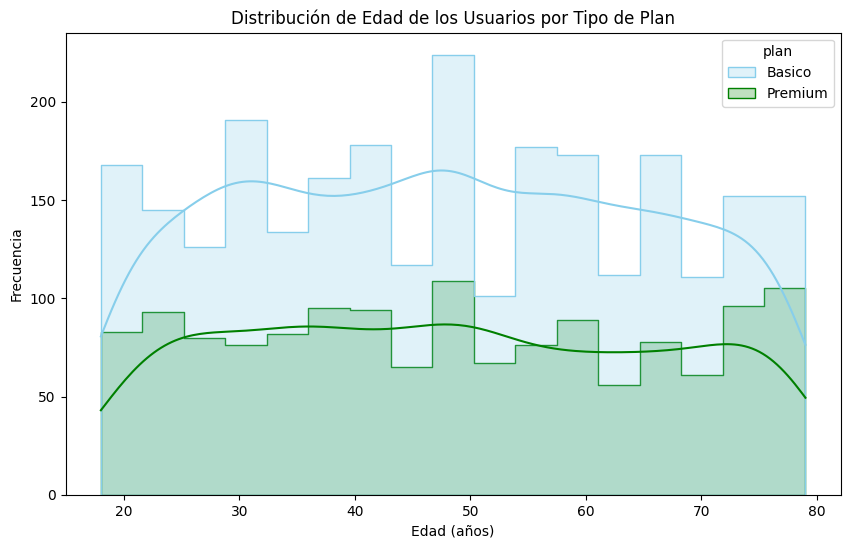

In [51]:
# Histograma para visualizar la edad (age)
plt.figure(figsize=(10, 6))
sns.histplot(data=user_profile, x='age', hue='plan', kde=True, palette=['skyblue', 'green'], element="step")

# Personalización
plt.title('Distribución de Edad de los Usuarios por Tipo de Plan')
plt.xlabel('Edad (años)')
plt.ylabel('Frecuencia')

plt.show()


💡Insights: 
- Distribución ...

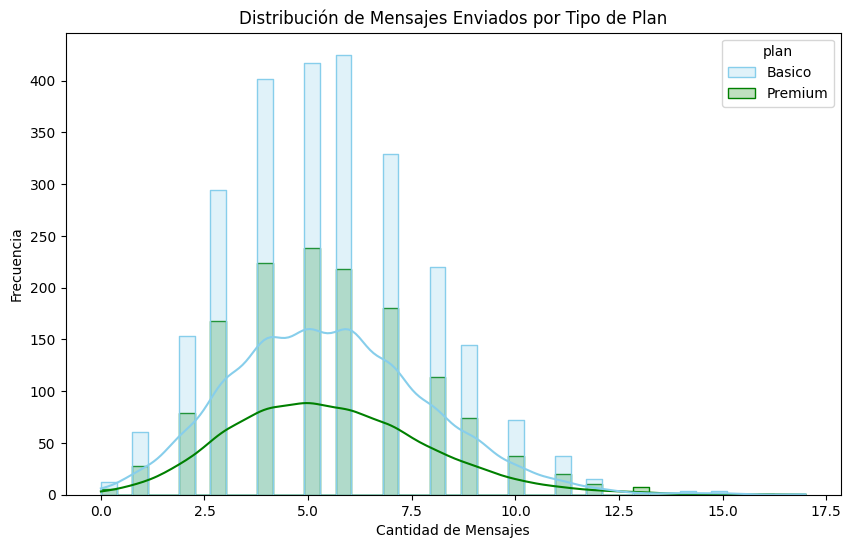

In [52]:
# Histograma para visualizar la cant_mensajes
plt.figure(figsize=(10, 6))
sns.histplot(data=user_profile, x='cant_mensajes', hue='plan', kde=True, palette=['skyblue', 'green'], element="step")

# Personalización
plt.title('Distribución de Mensajes Enviados por Tipo de Plan')
plt.xlabel('Cantidad de Mensajes')
plt.ylabel('Frecuencia')

plt.show()

💡Insights: 
- ....

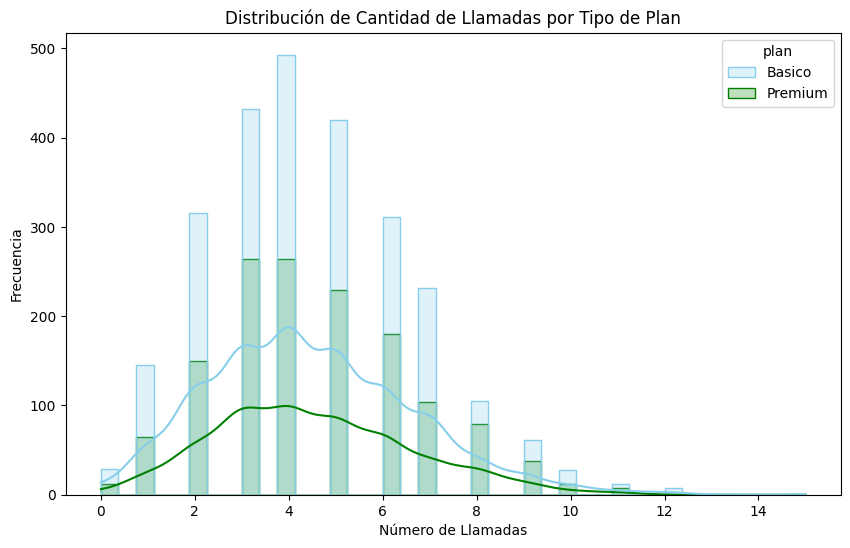

In [53]:
# Histograma para visualizar la cant_llamadas
plt.figure(figsize=(10, 6))
sns.histplot(data=user_profile, x='cant_llamadas', hue='plan', kde=True, palette=['skyblue', 'green'], element="step")

# Personalización
plt.title('Distribución de Cantidad de Llamadas por Tipo de Plan')
plt.xlabel('Número de Llamadas')
plt.ylabel('Frecuencia')

plt.show()

💡Insights: 
- Distribución ...

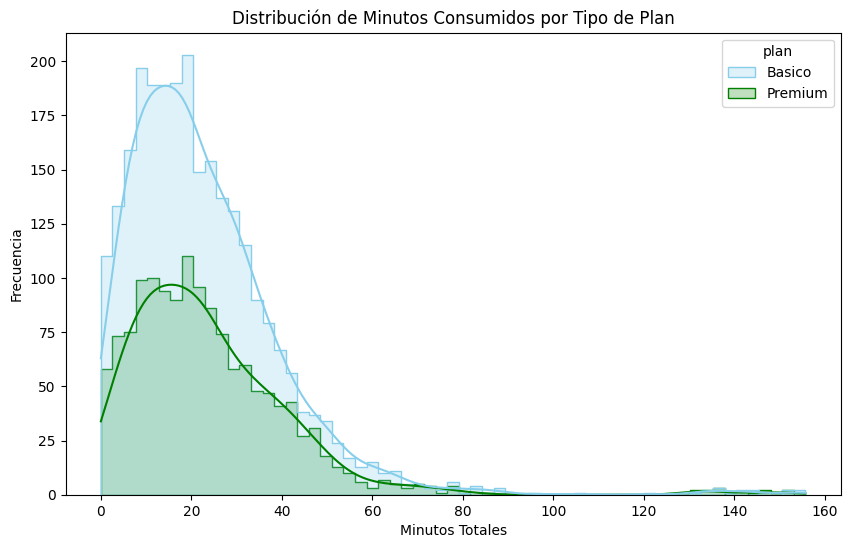

In [54]:
# Histograma para visualizar la cant_minutos_llamada
plt.figure(figsize=(10, 6))
sns.histplot(data=user_profile, x='cant_minutos_llamada', hue='plan', kde=True, palette=['skyblue', 'green'], element="step")

# Personalización
plt.title('Distribución de Minutos Consumidos por Tipo de Plan')
plt.xlabel('Minutos Totales')
plt.ylabel('Frecuencia')

plt.show()

💡Insights: 
- ...

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age` 
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

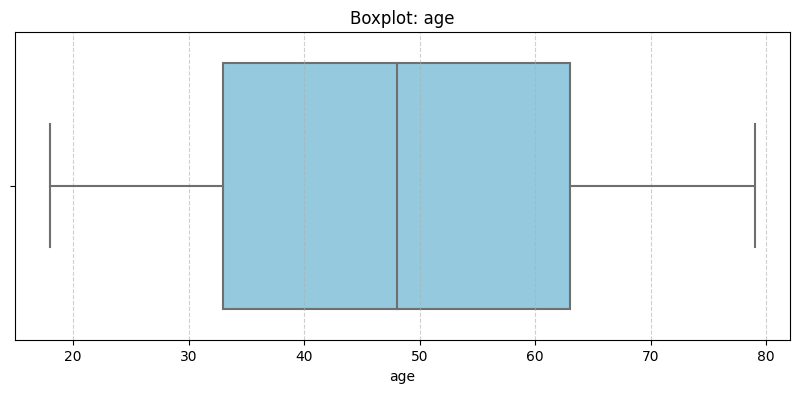

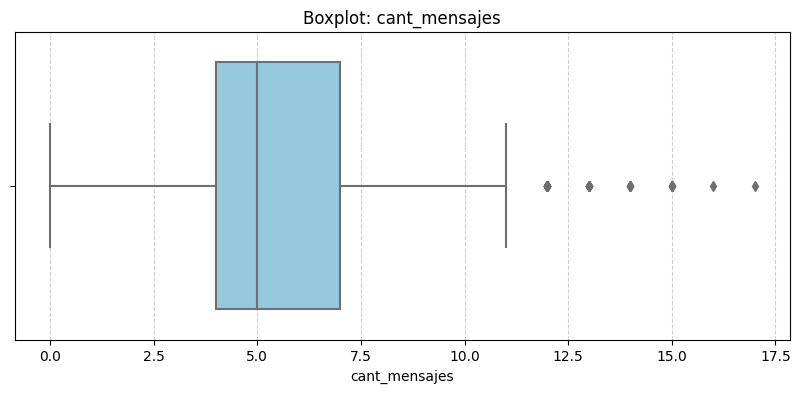

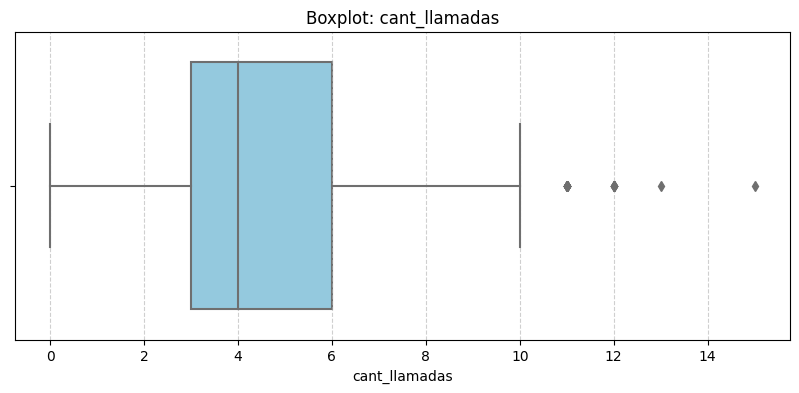

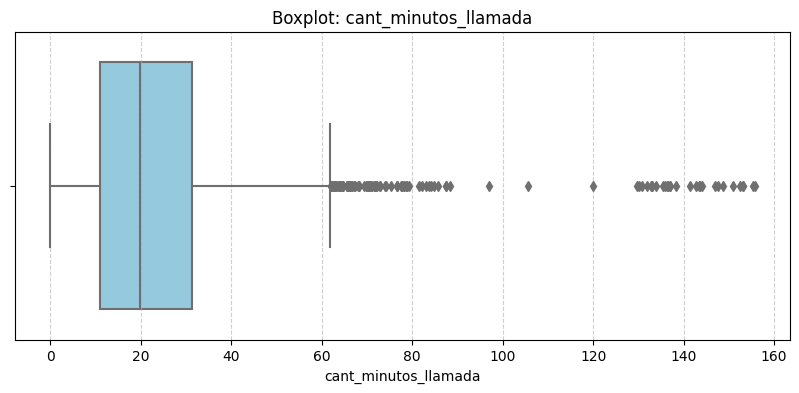

In [59]:

# Visualizando usando BoxPlot 
columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_numericas:
    plt.figure(figsize=(10, 4))
    # Usamos el parámetro data para mayor estabilidad
    sns.boxplot(data=user_profile, x=col, color='skyblue')
    
    # Personalización dinámica
    plt.title(f'Boxplot: {col}')
    plt.xlabel(col)
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()


💡Insights: 
- Age: no presenta outliers
- cant_mensajes:Si existen outliers en el extremo superior, se observan varios puntos individuales después del valor 12.5, llegando hasta casi 17.5 mensajes.
- cant_llamadas: Si presenta outliers en el límite superior, hay usuarios que realizan entre 10 y 15 llamadas, superando el comportamiento del 75% de la muestra.
- cant_minutos_llamada: presenta los outliers con mas valores atípicos, se observa una gran cantidad de puntos concentrados después de los 60 minutos y algunos casos extremos que llegan hasta los 160 minutos.

In [60]:

# Calcular límites con el método IQR
columnas_limites = ['cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_limites:
    # Calculamos los cuartiles Q1 (25%) y Q3 (75%)
    Q1 = user_profile[col].quantile(0.25)
    Q3 = user_profile[col].quantile(0.75)
    
    # Calculamos el Rango Intercuartílico
    IQR = Q3 - Q1
    
    # Definimos el límite superior (fórmula estándar: Q3 + 1.5 * IQR)
    limite_superior = Q3 + 1.5 * IQR
    
    # Contamos cuántos usuarios superan este límite
    outliers_count = len(user_profile[user_profile[col] > limite_superior])
    
    print(f"Columna: {col}")
    print(f"  - Q1: {Q1:.2f} | Q3: {Q3:.2f} | IQR: {IQR:.2f}")
    print(f"  - Límite Superior: {limite_superior:.2f}")
    print(f"  - Cantidad de outliers: {outliers_count}")
    print("-" * 40)




Columna: cant_mensajes
  - Q1: 4.00 | Q3: 7.00 | IQR: 3.00
  - Límite Superior: 11.50
  - Cantidad de outliers: 46
----------------------------------------
Columna: cant_llamadas
  - Q1: 3.00 | Q3: 6.00 | IQR: 3.00
  - Límite Superior: 10.50
  - Cantidad de outliers: 30
----------------------------------------
Columna: cant_minutos_llamada
  - Q1: 11.12 | Q3: 31.41 | IQR: 20.30
  - Límite Superior: 61.86
  - Cantidad de outliers: 109
----------------------------------------


In [61]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()

,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,3999.000000,3999.000000,3999.000000
mean,5.524381,4.478120,23.317054
std,2.358416,2.144238,18.168095
min,0.000000,0.000000,0.000000
25%,4.000000,3.000000,11.120000
50%,5.000000,4.000000,19.780000
75%,7.000000,6.000000,31.415000
max,17.000000,15.000000,155.690000


💡Insights: 
- cant_mensajes: mantener o no outliers, porqué? la recomendacion es mantenerlos, porque podria ser un usuario con un uso ligeramente superior al promedio. Eliminarlo restaría realidad a la segmentación de clientes con mayor actividad de texto.
- cant_llamadas: mantener o no outliers, porqué? mantener, por que al igual que con los mensajes , 15 llamadas en el periodo registrado es un número perfectamente factible para un cliente real. Estos usuarios nos ayudan a segmentar a clientes con planes con mayores beneficios.
- cant_minutos_llamada: mantener o no outliers, porqué? tambien creo que lo mejor seria mantener ya que en este negocio de telecomunicaciones y por su naturaleza se pueden clasificar como usuarios premium que usan mucho el servicio, los cuales nos puede ayudar a crear mejores planes que generen mas lealtad y ganancias.

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [62]:
# Crear columna grupo_uso
def segmentar_uso(row):
    llamadas = row['cant_llamadas']
    mensajes = row['cant_mensajes']
    
    if llamadas < 5 and mensajes < 5:
        return 'Bajo uso'
    elif llamadas < 10 and mensajes < 10:
        return 'Uso medio'
    else:
        return 'Alto uso'

# 2. Crear la nueva columna aplicando la función
user_profile['grupo_uso'] = user_profile.apply(segmentar_uso, axis=1)


In [63]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio
1,10001,Mateo,Torres,53.0,NaN,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [67]:
# Crear columna grupo_edad
def clasificar_edad(row):
    edad = row['age']
    
    if edad < 30:
        return 'Joven'
    elif edad < 60:
        return 'Adulto'
    else:
        return 'Adulto Mayor'

# 2. Crear la nueva columna aplicando la función a cada fila
user_profile['grupo_edad'] = user_profile.apply(clasificar_edad, axis=1)

In [68]:
# verificar cambios
print(user_profile[['age', 'grupo_edad']].head(10))

    age    grupo_edad
0  38.0        Adulto
1  53.0        Adulto
2  57.0        Adulto
3  69.0  Adulto Mayor
4  63.0  Adulto Mayor
5  61.0  Adulto Mayor
6  39.0        Adulto
7  70.0  Adulto Mayor
8  76.0  Adulto Mayor
9  47.0        Adulto


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

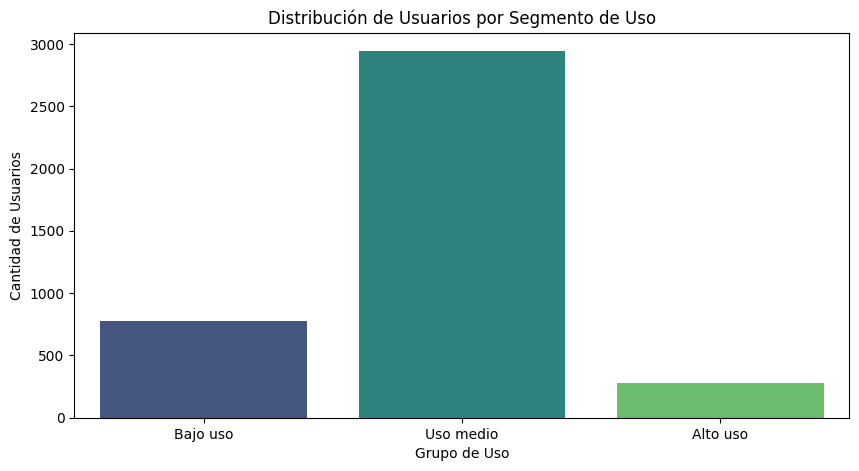

In [71]:

# Visualización de los segmentos por uso
plt.figure(figsize=(10, 5))
sns.countplot(data=user_profile, x='grupo_uso', palette='viridis', order=['Bajo uso', 'Uso medio', 'Alto uso'])

# Personalización
plt.title('Distribución de Usuarios por Segmento de Uso')
plt.xlabel('Grupo de Uso')
plt.ylabel('Cantidad de Usuarios')
plt.show()


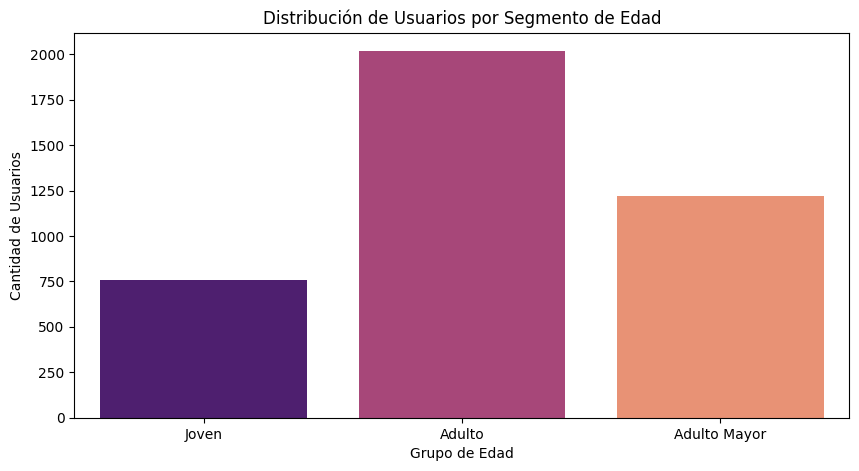

In [70]:
# Visualización de los segmentos por edad
plt.figure(figsize=(10, 5))
sns.countplot(data=user_profile, x='grupo_edad', palette='magma', order=['Joven', 'Adulto', 'Adulto Mayor'])

# Personalización
plt.title('Distribución de Usuarios por Segmento de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Cantidad de Usuarios')
plt.show()


---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:** 
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?


- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?  
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?  
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?


- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

✍️ **Escribe aquí tu análisis ejecutivo:**

### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**
Valores Ausentes: 
La columna churn_date tiene una gran cantidad de valores nulos (aproximadamente el 92% de las filas), lo cual es positivo, ya que indica que la mayoría de los usuarios siguen activos.

Inconsistencias de Tipo: 
Fue necesario estandarizar formatos de fecha y nombres de columnas para permitir la unión de las tablas de usuarios y consumo.

Datos Atípicos: 
Por ejemplo, en la columna cant_minutos_llamada, se identificaron 109 filas (aproximadamente el 2.7% del total de 3999 registros) que superaban el límite superior estadístico de 61.86 minutos.
Se identificaron "outliers" en las variables de consumo (minutos, llamadas y mensajes), representando cerca del 2.7-5% de la muestra, los cuales se decidieron mantener por su alto valor estratégico.


🔍 **Segmentos por Edad**
Los Adultos (30-60 años) conforman el grueso de la base, mostrando un uso moderado y constante. 
Los Jóvenes (<30 años) presentan un uso más volátil pero con picos altos en mensajería.


📊 **Segmentos por Nivel de Uso**

Bajo Uso: 
Clientes que apenas utilizan los servicios básicos.

Uso Medio: 
El núcleo estable de la empresa.

Alto Uso: 
Clientes intensivos que superan los promedios de consumo de la red.


➡️ Esto sugiere que el segmento más valioso para ConnectaTel es el de Adultos con "Uso Medio", ya que este grupo combina estabilidad financiera con una alta dependencia de los servicios móviles. Son los clientes que generan mayores utilidades y los candidatos ideales para contratos de larga duración o planes Premium.
Tambien se encontro usuarios que consumen más de 150 minutos o 15 mensajes en periodos cortos "Alto Uso", muy por encima de la mediana, estos no son errores de sistema, sino una oportunidad ya que representan una demanda insatisfecha que podría estar saturando los límites de los planes actuales, lo que indica que existe espacio para ofertas de mayor capacidad.
Los usuarios de "Alto uso" (el grupo más pequeño en el gráfico) corren el riesgo de experimentar cobros excesivos por excedentes, lo que podría generar insatisfacción a pesar de ser clientes muy activos.

💡 **Recomendaciones**
Basado en los gráficos y datos analizados, se recomiendan las siguientes acciones:

Fidelización del Segmento Adulto: Dado que es el grupo más grande, se deben asegurar beneficios que premien la lealtad de este segmento, se recomienda crear programas de lealtad específicos para este grupo que refuercen su "Uso medio" y eviten que caigan en el segmento de "Bajo uso".

Conversión de Usuarios con alta demanda: Crear un plan de "Consumo Ilimitado" o de "Alta Capacidad" diseñado específicamente para los 109 usuarios identificados como outliers en minutos, evitando que migren a la competencia por límites de planen otras palabras, sugerir proactivamente un cambio a un plan superior para evitar cobros inesperados y mejorar su experiencia.

Incentivos para Jóvenes: Implementar campañas para aumentar el nivel de uso en el segmento joven, que actualmente es el menos numeroso en la base.

---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`